# Kerasによるニューラルネット実装例(Gray)

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.datasets import cifar100
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import collections
import func
#Jupyterでインライン表示するための宣言
%matplotlib inline 

Using TensorFlow backend.


In [2]:
# 自分で設定するパラメータ
batch_size = 500
select_label = ['train','chair','tank','dolphin']
num_classes = len(select_label)
epochs = 50

In [3]:
# データ抽出
((x_train,y_train),(x_test, y_test)) = func.select_data(select_label)

# データ整形
## x_trainをグレースケールに変換する
x_train =np.array([np.asarray(Image.fromarray(np.uint8(i)).convert('L')) for i in x_train])
## x_trainを行列からベクトルにする
x_train = x_train.reshape(x_train.shape[0],32*32)

## x_testをグレースケールに変換する
x_test =np.array([np.asarray(Image.fromarray(np.uint8(i)).convert('L')) for i in x_test])
## x_testを行列からベクトルにする
x_test = x_test.reshape(x_test.shape[0],32*32)

## x_train, x_testを正規化する
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## データシェイプの確認
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(2000, 1024) train samples
(400, 1024) test samples


['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree',

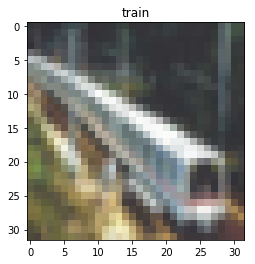

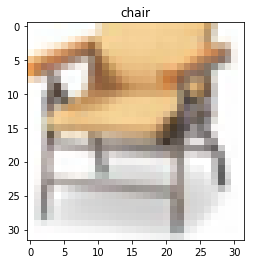

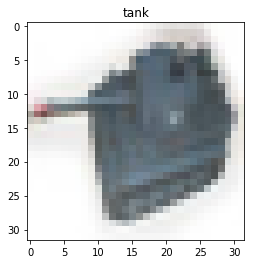

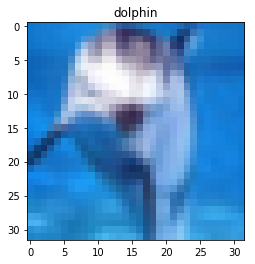

In [4]:
# データセットの確認

sample_dict = func.sample_dict()
print(list(sample_dict.keys()))

(xtrain_samples,ytrain_samples),(xtest_samples,ytest_samples) = func.select_data(select_label)

for e,l in enumerate(select_label):
    
    img = xtrain_samples[500*e]

    fig = plt.figure(figsize=(4,4))
    
    plt.title(l)

    #画像表示
    plt.imshow(img)

In [5]:
# モデル構築
model = Sequential()

# 最初の隠れ層(入力1024-> 出力512)
model.add(Dense(200, activation='relu', input_shape=(1024,)))
model.add(Dropout(0.2))

# 隠れ層(入力512 -> 出力512)
## 隠れ層は追加可能
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

# 出力層(入力512 -> 出力:クラス数)
model.add(Dense(num_classes, activation='softmax'))

# モデル概要表示
model.summary()

# モデルのコンパイル
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# フィッティング(学習)
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

# スコア計算・表示
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               205000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               102912    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 2052      
Total params: 309,964
Trainable params: 309,964
Non-trainable params: 0
_________________________________________________________________
Train on 2000 samples, validate on 400 samples
Epoch 1/50
2000/2000 [==============================] - 0s - loss: 1.4275 - acc: 0.3070 -

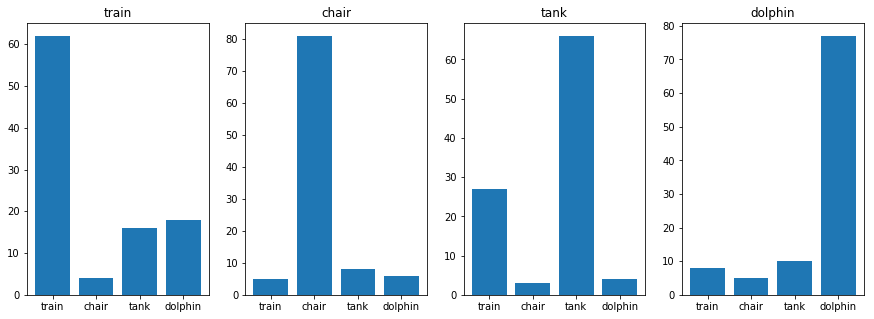

In [6]:
# 学習結果の表示
res = [np.argmax(i) for i in model.predict(x_test)]
plt.figure(figsize=(15,5))
for i in range(len(select_label)):
    plt.subplot(1,num_classes,i+1)
    plt.title(select_label[i])
    res_counter = collections.Counter(res[i*100:(i+1)*100])
    plt.bar(list(res_counter.keys()),res_counter.values())
    plt.xticks(np.arange(num_classes),select_label)
plt.show()

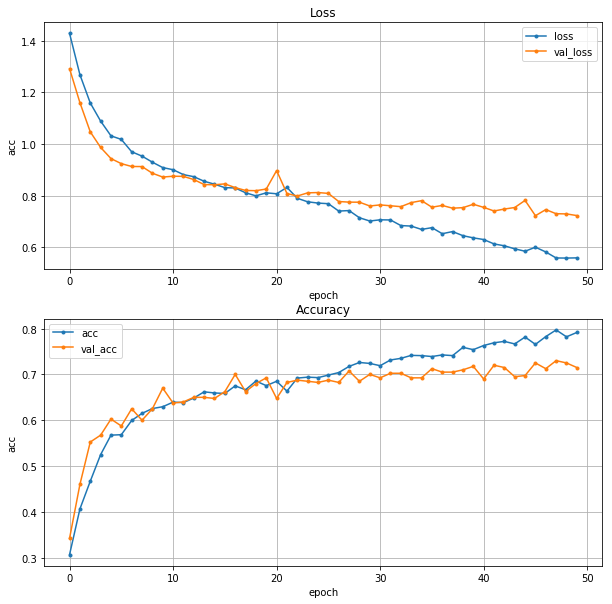

In [7]:
import matplotlib.pyplot as plt
# plot results
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Loss')
epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='loss')
plt.plot(range(epochs), val_loss, marker='.', label='val_loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')

plt.subplot(2,1,2)
plt.title('Accuracy')
plt.plot(range(epochs), acc, marker='.', label='acc')
plt.plot(range(epochs), val_acc, marker='.', label='val_acc')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

plt.savefig('rms_cifar3_50epochs.png')

In [ ]:
# 学習モデルの保存
model.save("cifar100_trained.h5")

# モデルのテスト

## 画像読み込み

(32, 32)


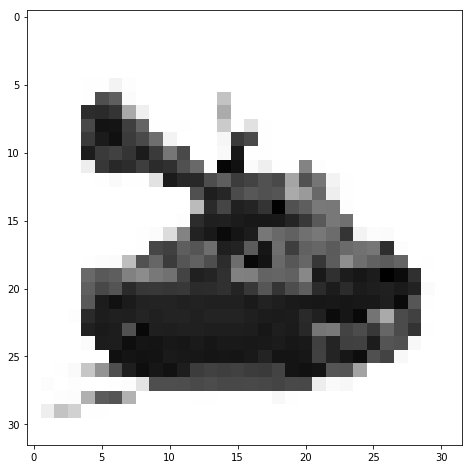

In [10]:
fig = plt.figure(figsize=(8,8))

#画像の読み込み
org_img = Image.open("./test.jpeg")

#解像度変更
gray_img = org_img.resize((32,32))

# 画像を白黒に変換
gray_img = gray_img.convert('L')

#画像をarrayに変換
im_list = np.array(gray_img, 'f')
print(im_list.shape)

#正規化
im_list = im_list/255

#画像表示
plt.imshow(im_list,cmap=plt.get_cmap('gray'))

## 読み込んだ画像の判別

In [11]:
# 保存したモデルを読み込む場合は実行
# model = keras.models.load_model('./mnist_data.h5')

test = im_list.reshape(1,1024)

# 判別値の確率
print(model.predict(test))
print('\n')

#判別結果
print("Result:",select_label[np.argmax(model.predict(test)[0])])

[[  3.00028045e-02   7.38206087e-04   9.69176888e-01   8.21322537e-05]]


Result: tank
